In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import os
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
path = os.listdir('/content/gdrive/MyDrive/Project_Brain_tumor/Training (Extra)/')
print(path)
classes = {'notumor':0, 'meningioma': 1, 'glioma': 2, 'pituitary': 3}

['glioma', 'meningioma', 'notumor', 'pituitary']


In [ ]:
Xtrain = []
ytrain = []
Xtest = []
ytest = []
for cls in classes:
  pth_train = '/content/gdrive/MyDrive/Project_Brain_tumor/Training (Extra)/' + cls
  for j in os.listdir(pth_train):
    img = cv2.imread(pth_train + '/' + j, 0)
    img = cv2.resize(img, (200,200))
    Xtrain.append(img)
    ytrain.append(classes[cls])
  pth_test = '/content/gdrive/MyDrive/Project_Brain_tumor/Testing (Extra)/' + cls
  for j in os.listdir(pth_test):
    img = cv2.imread(pth_test + '/' + j, 0)
    img = cv2.resize(img, (200,200))
    Xtest.append(img)
    ytest.append(classes[cls])
Xtrain = np.array(Xtrain)
ytrain = np.array(ytrain)
Xtest = np.array(Xtest)
ytest = np.array(ytest)
print(np.shape(Xtrain),np.shape(ytrain),np.shape(Xtest),np.shape(ytest))

(5712, 200, 200) (5712,) (1311, 200, 200) (1311,)


In [ ]:
Xtrain_updated = Xtrain.reshape(len(Xtrain), -1)
print(np.shape(Xtrain_updated))
Xtest_updated = Xtest.reshape(len(Xtest), -1)
print(np.shape(Xtest_updated))

(5712, 40000)
(1311, 40000)


(array([0, 1, 2, 3]), array([1595, 1339, 1321, 1457]))


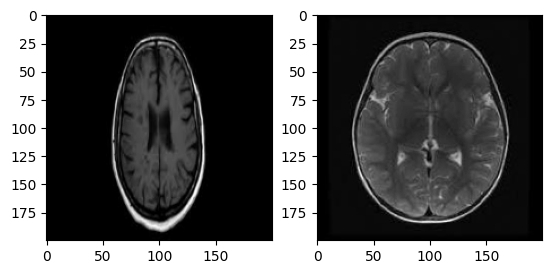

In [ ]:
print(np.unique(ytrain,return_counts = True))
plt.subplot(1,2,1)
plt.imshow(Xtrain[0], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(Xtest[0], cmap = 'gray')

In [ ]:
Xtrain_normalized = Xtrain_updated / 255
Xtest_normalized = Xtest_updated / 255

In [ ]:
dec = {0: 'notumor', 1: 'meningioma', 2: 'glioma', 3: 'pituitary'}
p = ['notumor', 'meningioma', 'glioma', 'pituitary']
print(p)
def draw_cm():
  ypred = svc.predict(Xtest_normalized)
  print(np.unique(ytest),np.unique(ypred))
  cm = confusion_matrix(ytest, ypred)
  sns.heatmap(cm, cmap = 'Greens', xticklabels = p,
              yticklabels = p, annot = True, fmt = 'd')
  plt.show()

['notumor', 'meningioma', 'glioma', 'pituitary']


Percentage:  0.9138062547673532
[0 1 2 3] [0 1 2 3]


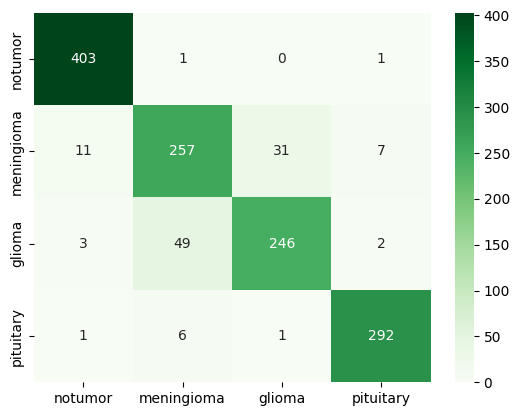

In [ ]:
svc = SVC(kernel = 'linear', C = 1e10)
svc.fit(Xtrain_normalized, ytrain)
print('Percentage: ', svc.score(Xtest_normalized, ytest))
draw_cm()

Percentage:  0.9130434782608695
[0 1 2 3] [0 1 2 3]


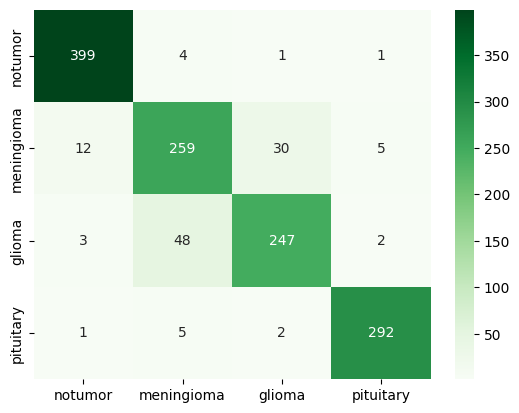

In [ ]:
svc = SVC(kernel = 'linear', C = 0.01)
svc.fit(Xtrain_normalized, ytrain)
print('Percentage: ', svc.score(Xtest_normalized, ytest))
draw_cm()

Percentage:  0.9191456903127384
[0 1 2 3] [0 1 2 3]


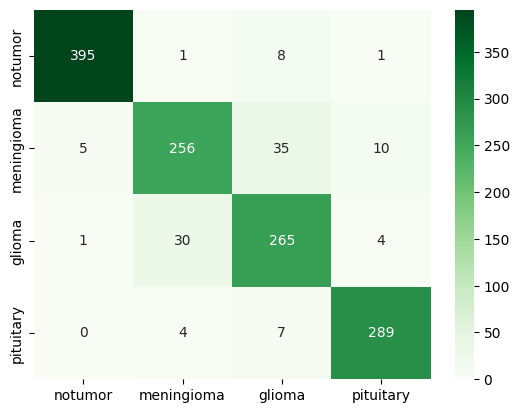

In [ ]:
svc = SVC(kernel = 'poly')
svc.fit(Xtrain_normalized, ytrain)
print('Percentage: ', svc.score(Xtest_normalized, ytest))
draw_cm()

Percentage:  0.13424866514111367
[0 1 2 3] [0 2 3]


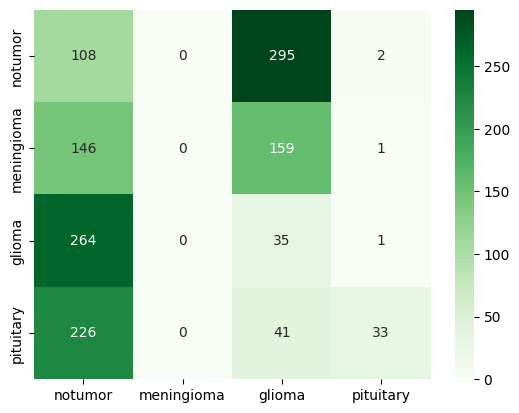

In [ ]:
svc = SVC(kernel = 'sigmoid')
svc.fit(Xtrain_normalized, ytrain)
print('Percentage: ', svc.score(Xtest_normalized, ytest))
draw_cm()

Percentage:  0.8886346300533944
[0 1 2 3] [0 1 2 3]


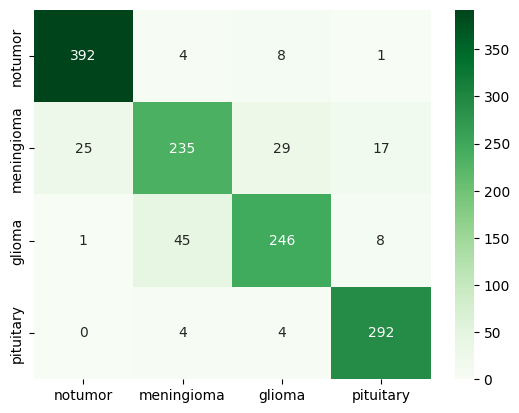

In [ ]:
svc = SVC()
svc.fit(Xtrain_normalized, ytrain)
print('Percentage: ', svc.score(Xtest_normalized, ytest))
draw_cm()